## Customer segmentation - Dimensional Reduction and Clustering

Content : 
1. Importing Libraries
2. Data Loading
3. Data Cleaning
4. Data Preprocessing 
5. Dimensionality reduction by T-SNE
6. Clustering
7. Evaluating 
8. Profiling
9. Conclusion

### 1.Importing Libraries

In [1]:
# Importing Common Libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Importing colour palet
import matplotlib.colors
pal = ['#009473', '#00537c', '#b4b4b4', '#da3e21']
cmap = matplotlib.colors.ListedColormap(pal)

# Import libraries for pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Import libraries for clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import time
import plotly.graph_objects as go

#Remove warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

np.random.seed(42)

### 2.Data Loading

In [2]:
path = "C:/Users/zubin/OneDrive/Desktop/marketing_campaign.csv"
df = pd.read_csv(path, sep = '\t')

### 3. Data Cleaning
#### 3.1 Understanding data

In [3]:
#Check the dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
#Check the shape of the dataset
df.shape

(2240, 29)

In [5]:
# Rename columns for clarity and ease of use
df = df.rename(columns = {
    'MntWines' : 'Wines',
    'MntFruits' : 'Fruits',
    'MntMeatProducts' : 'Meat',
    'MntFishProducts' : 'Fish',
    'MntSweetProducts' : 'Sweets',
    'MntGoldProds' : 'Gold'
})

In [6]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [7]:
# List of column names based on data type
numeric_columns = ['Income', 'Kidhome',
       'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

bool_columns = [ 'Complain', 'Response']

category_columns = ['Education', 'Marital_Status']

date_columns = ['Year_Birth', 'Dt_Customer']

In [8]:
# Check the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   Wines                2240 non-null   int64  
 10  Fruits               2240 non-null   int64  
 11  Meat                 2240 non-null   int64  
 12  Fish                 2240 non-null   int64  
 13  Sweets               2240 non-null   int64  
 14  Gold                 2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

As you can see : \
1. There are missing values in Income \
2. Dt_Customer indicates the date a customer joined the supermarket is not parsed as Date Time \
3. There are some categorical features in our data frame (as there are some features are object data types). Thus we will need to encode them into numeric forms.

#### 3.2 Check and Handle missing values


In [9]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
Wines                   0
Fruits                  0
Meat                    0
Fish                    0
Sweets                  0
Gold                    0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

As you can see, there are 24 missing values in the Income column. \
These missing values need to be filled in order to procede.

In [10]:
income_missing = df[df['Income'].isna()]

In [11]:
income_missing.shape

(24, 29)

In [12]:
#Calculate the mean values of income grouped by education level
group_means = df.groupby('Education')['Income'].mean()

#Impute missing values in the "Income" column
df['Income'] = df['Income'].fillna(df['Education'].map(group_means))

In [13]:
#Re-check the missing values of the dataset
print('Missing data: ', df.isna().sum().sum())

Missing data:  0


#### 3.3 Cleaning Data

Our next steps involve feature engineering, which includes creating new attributes and modifying existing ones. The following are the specific steps we plan to take:

1. We will create a new attribute called "Days_since_enrolment" to indicate the number of days since a customer started shopping at the supermarket.
2. We will extract the "Age" of a customer by using their "Year_Birth" attribute.
3. We will create a new attribute called "Spent" to indicate the total amount of money a customer spent in various categories over a period of 2 years.
4. We will group the "Marital Status" attribute into two categories: "Alone" and "Partner".
5. We will create a new attribute called "Children" to indicate the total number of children in a household, combining both kids and teenagers.
6. We will create a new attribute called "Family_Size" to further clarify the size of a household.
7. We will create a new attribute called "Is_Parent" to indicate whether a customer is a parent or not.
8. We will simplify the "Education" attribute by grouping its values into three categories.
9. We will drop some of the redundant features that are not necessary for our analysis.

In [14]:
# Convert 'Dt_Customer' to a date time format
df['Dt_customer'] = pd.to_datetime(df['Dt_Customer'], format = '%d-%m-%Y')

#Find the max and min dates in the Dt_customer column
max_date = df['Dt_customer'].max()
min_date = df['Dt_customer'].min()
print("The newest customer's enrolment date in the records:", max_date)
print("The oldest customer's enrolment date in the records:", min_date)

#Calculate the number of days between the enrolment date and the maximum date
df['Days_since_enrolment'] = df['Dt_customer'].apply(lambda x: (max_date - x).days)

#Calculate the age of customers
df['Age'] = 2023 - df['Year_Birth']

The newest customer's enrolment date in the records: 2014-06-29 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00


In [15]:
# Count of column values
print('Values of Education levels : ', df['Education'].value_counts())
print('Values of Marital Status : ', df['Marital_Status'].value_counts())

Values of Education levels :  Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Values of Marital Status :  Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [16]:
#Group marital status into only two status 
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: "Partner" if x in {"Married", "Together"} else "Alone")


#Segment education levels in three groups
df['Education'] = df['Education'].replace({'Basic' : 'Undergrade', 
                                           '2n Cycle' : 'Undergrade', 
                                           'Graduation' : 'Graduate', 
                                           'Master' : 'Postgraduate',
                                           'PhD' : 'Postgraduate'})

                                           
print('Values of Education levels: ', df['Education'].value_counts())
print('Values of Marital Status: ', df['Marital_Status'].value_counts())

Values of Education levels:  Graduate        1127
Postgraduate     856
Undergrade       257
Name: Education, dtype: int64
Values of Marital Status:  Partner    1444
Alone       796
Name: Marital_Status, dtype: int64


In [17]:
#Calculate the total children living the household
df['Children'] = df['Kidhome'] + df['Teenhome']

#Calculate the total members in the household
df['Family_Size'] = df['Marital_Status'].replace({"Alone" : 1, "Partner" : 2}) + df['Children']

#Check pertain parenthood
df['Is_Parent'] = np.where(df.Children > 0, 1, 0)

In [18]:
#Total spendings on various categories
df['Spent'] = df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweets'] + df['Gold']

In [19]:
#Drop some of redundant attributes
to_drop = ['Dt_customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2']
df = df.drop(to_drop, axis = 1)

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Education             2240 non-null   object 
 1   Marital_Status        2240 non-null   object 
 2   Income                2240 non-null   float64
 3   Kidhome               2240 non-null   int64  
 4   Teenhome              2240 non-null   int64  
 5   Dt_Customer           2240 non-null   object 
 6   Recency               2240 non-null   int64  
 7   Wines                 2240 non-null   int64  
 8   Fruits                2240 non-null   int64  
 9   Meat                  2240 non-null   int64  
 10  Fish                  2240 non-null   int64  
 11  Sweets                2240 non-null   int64  
 12  Gold                  2240 non-null   int64  
 13  Complain              2240 non-null   int64  
 14  Response              2240 non-null   int64  
 15  Days_since_enrolment 

None

#### 3.4 Feature EDA


In [20]:
df.describe().T.style.bar(subset=['mean','min','50%'],
                          color=pal[0]).highlight_max(subset=['max'],color=pal[3]).set_caption('Basic Stats of The Data')

,count,mean,std,min,25%,50%,75%,max
Income,2240.000000,52253.592375,25039.085601,1730.000000,35538.750000,51609.500000,68289.750000,666666.000000
Kidhome,2240.000000,0.444196,0.538398,0.000000,0.000000,0.000000,1.000000,2.000000
Teenhome,2240.000000,0.506250,0.544538,0.000000,0.000000,0.000000,1.000000,2.000000
Recency,2240.000000,49.109375,28.962453,0.000000,24.000000,49.000000,74.000000,99.000000
Wines,2240.000000,303.935714,336.597393,0.000000,23.750000,173.500000,504.250000,1493.000000
Fruits,2240.000000,26.302232,39.773434,0.000000,1.000000,8.000000,33.000000,199.000000
Meat,2240.000000,166.950000,225.715373,0.000000,16.000000,67.000000,232.000000,1725.000000
Fish,2240.000000,37.525446,54.628979,0.000000,3.000000,12.000000,50.000000,259.000000
Sweets,2240.000000,27.062946,41.280498,0.000000,1.000000,8.000000,33.000000,263.000000
Gold,2240.000000,44.021875,52.167439,0.000000,9.000000,24.000000,56.000000,362.000000


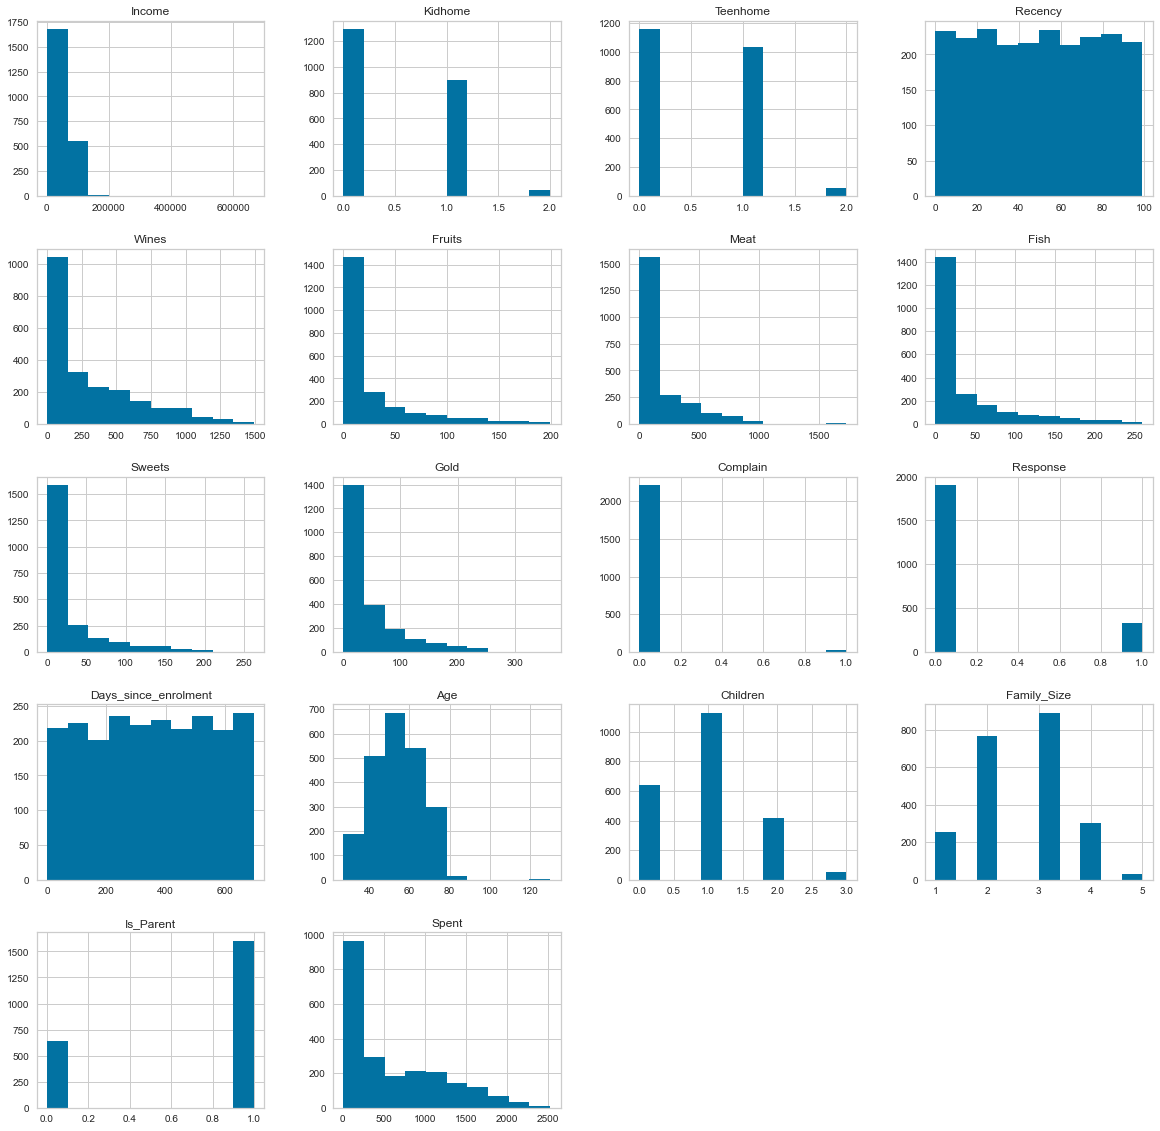

In [21]:
#Plot histograms of columns
df.hist(figsize=(20,20))
plt.show()

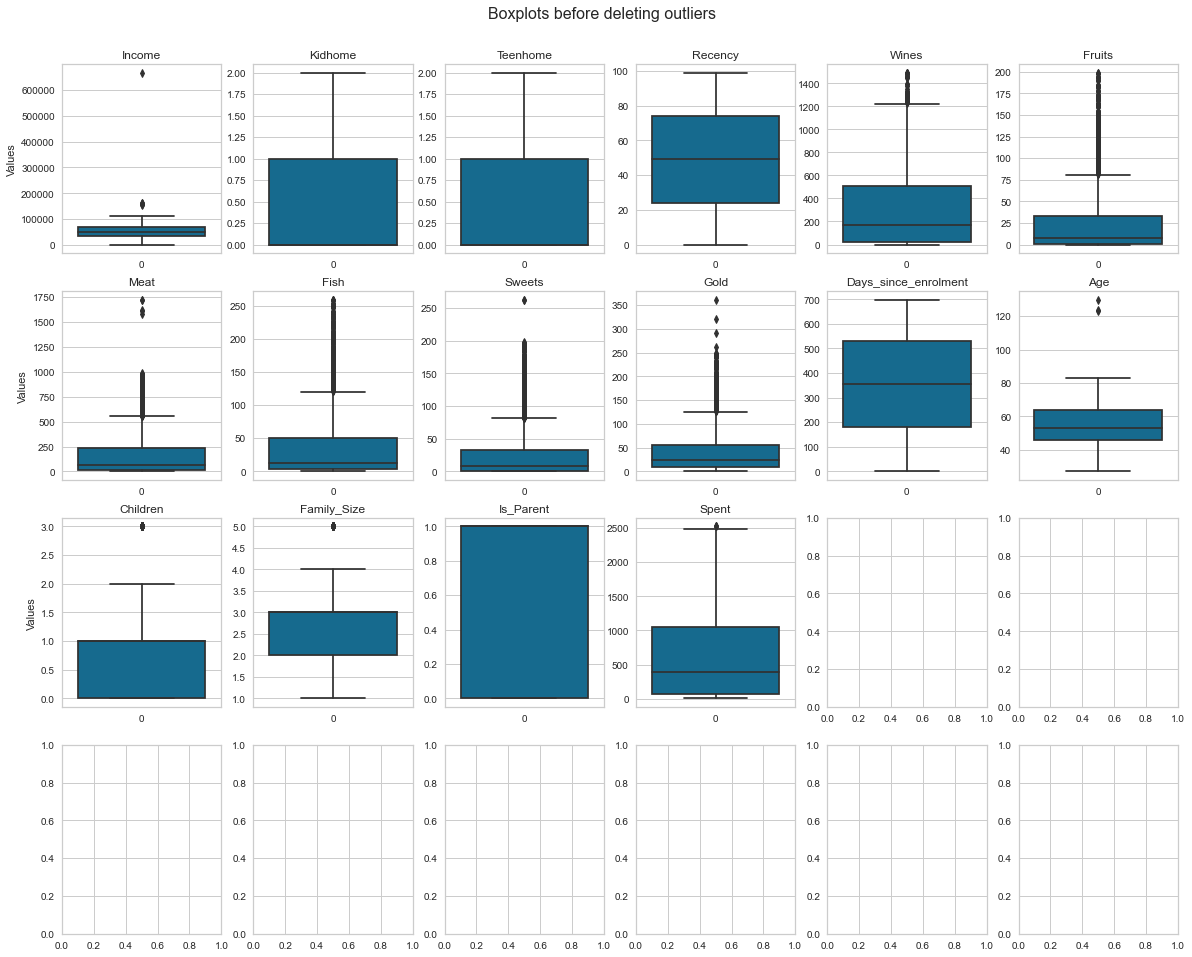

In [22]:
#list numeric columns of the data set
numeric_columns = ['Income', 'Kidhome',
       'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold',  
       'Days_since_enrolment', 'Age', 'Children',
       'Family_Size', 'Is_Parent', 'Spent']

def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(20,16)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=4, cols=6, suptitle='Boxplots before deleting outliers')

From the box plots, we can see the age which is more than 90 and the income which is more than 600000 are unusual, thus we need to drop them.

In [23]:
#Drop outliers by setting a cap in the 'Income' and 'Age' columns
df= df[(df['Age'] < 90)]
df = df[(df['Income'] < 600000)]
print('The total number of data points after removing outliers:', len(df))

The total number of data points after removing outliers: 2236


#### 3.5 Correlation


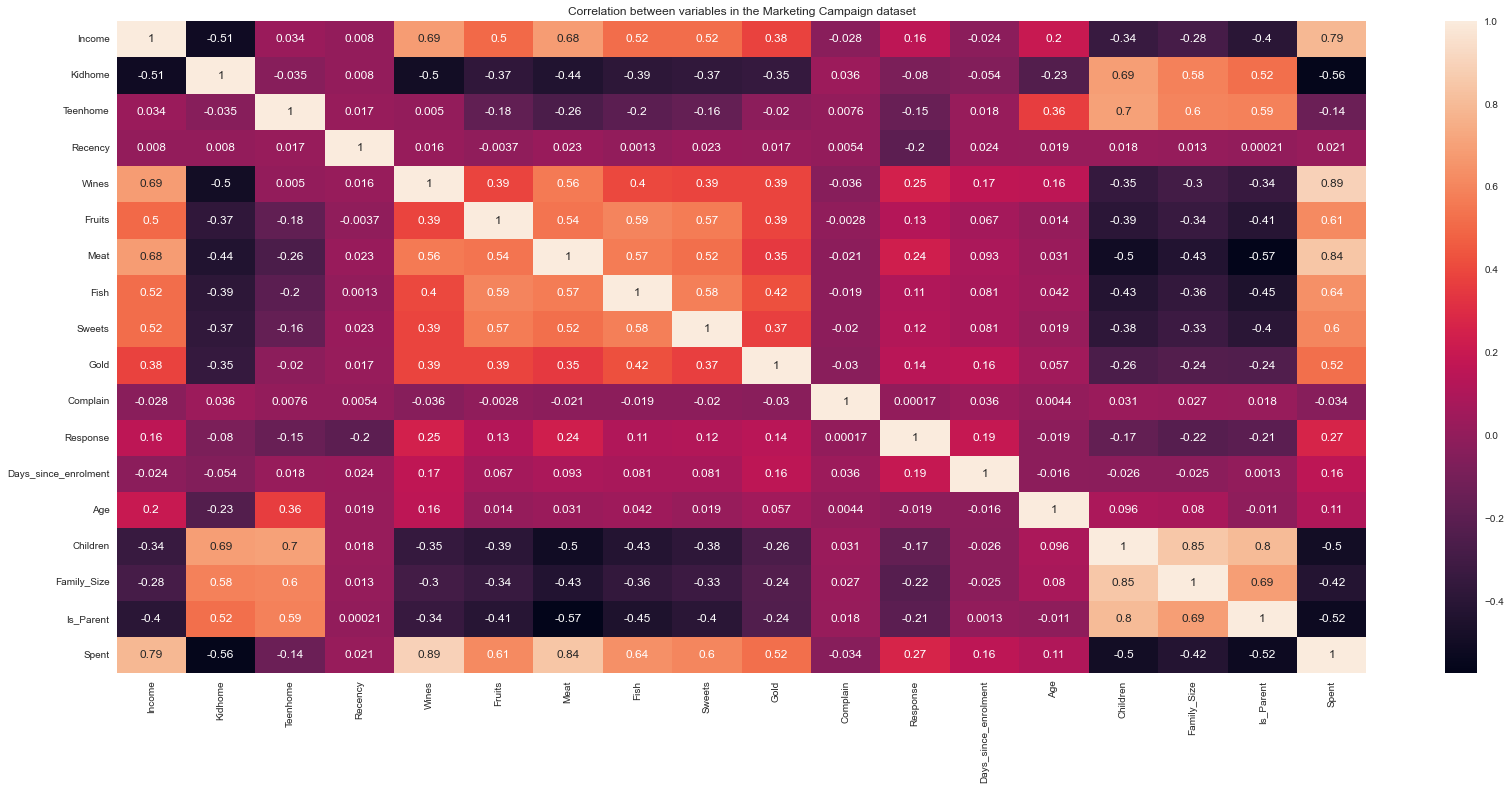

In [24]:
#Find the correlation between the variables
plt.figure(figsize=(28, 12))
sns.heatmap(df.corr(),
            annot = True)
plt.title('Correlation between variables in the Marketing Campaign dataset')
plt.show()

#### Note: 
The is a strong relationship between Income and Spent with 0.79

<a id="sec-4"></a>
# 4. DATA PRE-PROCESSING
Prior to conducting clustering operations, we will be carrying out data preprocessing which comprises of two stages:
* Encoding the categorical columns using label encoding technique.
* Scaling the data utilizing the standard scaler approach.
<a id="sub-4-1"></a>

## 4.1. Label enconding the categorical columns

In [25]:
# create an instance of LabelEncoder
le = LabelEncoder()

#copy original dataset
ds = df.copy()
# select categorical columns
categorical_cols = ds.select_dtypes(include=['object']).columns.tolist()

# label encode each column in the list
for col in categorical_cols:
    ds[col] = le.fit_transform(ds[col])
    
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Education             2236 non-null   int32  
 1   Marital_Status        2236 non-null   int32  
 2   Income                2236 non-null   float64
 3   Kidhome               2236 non-null   int64  
 4   Teenhome              2236 non-null   int64  
 5   Dt_Customer           2236 non-null   int32  
 6   Recency               2236 non-null   int64  
 7   Wines                 2236 non-null   int64  
 8   Fruits                2236 non-null   int64  
 9   Meat                  2236 non-null   int64  
 10  Fish                  2236 non-null   int64  
 11  Sweets                2236 non-null   int64  
 12  Gold                  2236 non-null   int64  
 13  Complain              2236 non-null   int64  
 14  Response              2236 non-null   int64  
 15  Days_since_enrolment 

In [26]:
ds.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,...,Sweets,Gold,Complain,Response,Days_since_enrolment,Age,Children,Family_Size,Is_Parent,Spent
0,0,0,58138.0,0,0,80,58,635,88,546,...,88,88,0,1,663,66,0,1,0,1617
1,0,0,46344.0,1,1,157,38,11,1,6,...,1,6,0,0,113,69,2,3,1,27
2,0,1,71613.0,0,0,444,26,426,49,127,...,21,42,0,0,312,58,0,2,0,776
3,0,1,26646.0,1,0,199,26,11,4,20,...,3,5,0,0,139,39,1,3,1,53
4,1,1,58293.0,1,0,390,94,173,43,118,...,27,15,0,0,161,42,1,3,1,422


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Education             2236 non-null   object 
 1   Marital_Status        2236 non-null   object 
 2   Income                2236 non-null   float64
 3   Kidhome               2236 non-null   int64  
 4   Teenhome              2236 non-null   int64  
 5   Dt_Customer           2236 non-null   object 
 6   Recency               2236 non-null   int64  
 7   Wines                 2236 non-null   int64  
 8   Fruits                2236 non-null   int64  
 9   Meat                  2236 non-null   int64  
 10  Fish                  2236 non-null   int64  
 11  Sweets                2236 non-null   int64  
 12  Gold                  2236 non-null   int64  
 13  Complain              2236 non-null   int64  
 14  Response              2236 non-null   int64  
 15  Days_since_enrolment 

<a id="sub-4-2"></a>
## 4.2. Scale data using Standard Scaler

In [28]:
df_before_scale = ds.drop(bool_columns, axis = 1)

In [29]:
#Get data for scaling by removing boolean columns
df_before_scale = ds.drop(bool_columns, axis = 1) #new data frame with numeric

# create an instance of the StandardScaler class
scaler = StandardScaler()

# fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(df_before_scale)


# create a new dataframe with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_before_scale.columns)

df_scaled.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Days_since_enrolment,Age,Children,Family_Size,Is_Parent,Spent
0,-0.89438,-1.347635,0.288195,-0.824939,-0.930615,-1.303716,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,1.529793,1.016868,-1.264308,-1.758810,-1.584362,1.680176
1,-0.89438,-1.347635,-0.262715,1.032627,0.905974,-0.898592,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-1.191143,1.273264,1.395139,0.445618,0.631169,-0.962202
2,-0.89438,0.742041,0.917627,-0.824939,-0.930615,0.611419,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,-0.206659,0.333146,-1.264308,-0.656596,-1.584362,0.282541
3,-0.89438,0.742041,-1.182829,1.032627,-0.930615,-0.677614,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,-1.062517,-1.290693,0.065416,0.445618,0.631169,-0.918994
4,0.57070,0.742041,0.295435,1.032627,-0.930615,0.327306,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,-0.953679,-1.034298,0.065416,0.445618,0.631169,-0.305762


## DIMENSIONALITY REDUCTION T-SNE
Dimensionality reduction refers to the technique of decreasing the number of random variables that are being analyzed by obtaining a group of primary variables. PCA and T-SNE are methods used for reducing the dimensionality of these datasets, which enhances interpretability while minimizing any loss of information.

#### Dimensionality Reduction using T-SNE

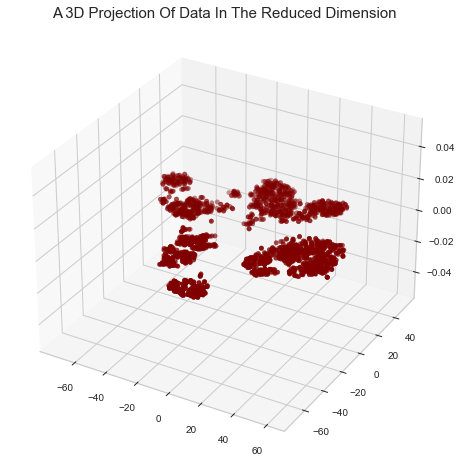

In [30]:
from sklearn.manifold import TSNE

# Apply t-SNE on the df_scaled data
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_scaled)
df_tsne = pd.DataFrame(df_tsne, columns=['D1', 'D2'])

x =df_tsne["D1"]
y =df_tsne["D2"]

# Plot t-SNE
fig = plt.figure(figsize=(10,8))
a = fig.add_subplot(111, projection="3d")
a.scatter(x,y, c="maroon", marker="o" )
a.set_title("A 3D Projection Of Data In The Reduced Dimension", size=15)
plt.show()

## Clustering
We have completed dimensionality reduction (but the explained variance was not very good). As a result, we can move on to clustering. To determine the best number of clusters to create, we will utilize the elbow method.

#### 6.1 Finding number of clusters using elbow method

Elbow Method to determine the number of clusters to be formed:


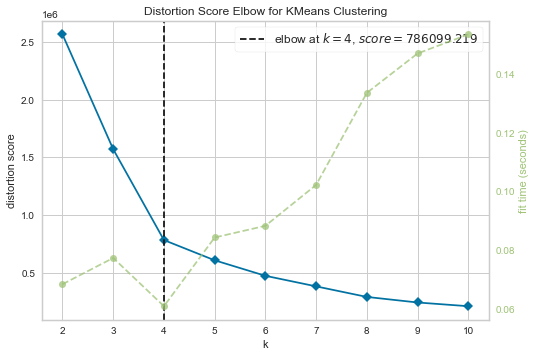

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_tsne)
Elbow_M.show()

#### 6.2 Find the best clustering method

In [32]:
# Define clustering methods
clustering_methods = [cluster.KMeans,
                      cluster.AgglomerativeClustering,
                      cluster.MeanShift,
                      cluster.AffinityPropagation,
                      cluster.SpectralClustering,
                      cluster.Birch
                     ]

data_arg = [(),(),(),(),(),(),()]


# Define parameters for each clustering method
clustering_para = [{'n_clusters':4},
                   {'n_clusters':4, 'linkage':'ward'},
                   {'cluster_all':False},
                   {'damping' : 0.9},
                   {'n_clusters':4},
                   {'threshold' : 0.01, 'n_clusters':4}
                  ]


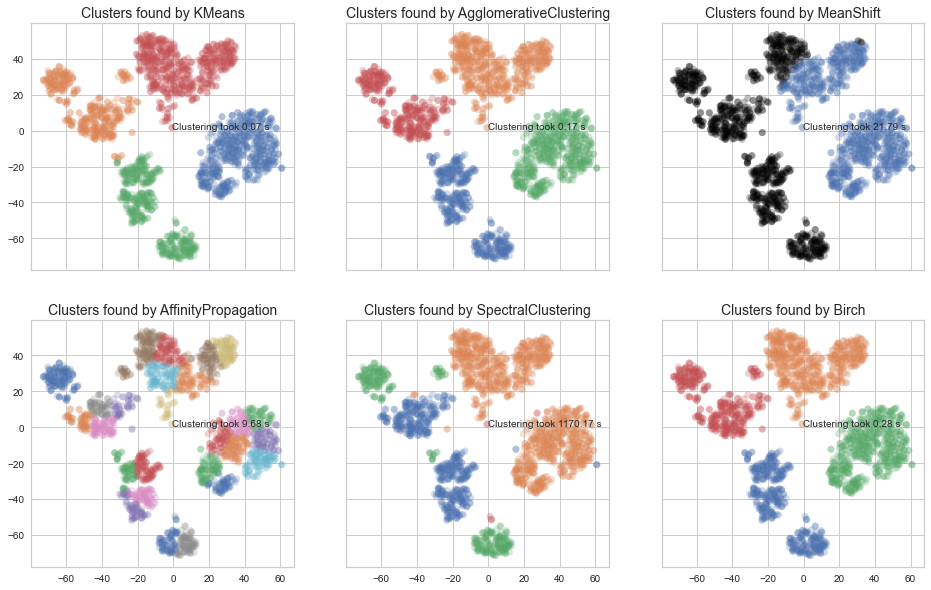

In [33]:
plot_kwds = {'alpha' : 0.25, 's' : 50, 'linewidths':0}
clusters_series = []

def plot_clusters(data, algorithms, args, kwds, axs):
    for j, i in enumerate(axs):
        algorithm = algorithms[j]
        start_time = time.time()
        labels = algorithm(*args[j], **kwds[j]).fit_predict(data)
        end_time = time.time()
        clusters_series.append(labels)
        
        #plotting
        palette = sns.color_palette('deep', np.unique(labels).max() + 1)
        colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]        
        i.scatter(data.iloc[:,0], data.iloc[:,1],c=colors,  **plot_kwds)
        i.set_title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=14)
        i.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=10)
    
    
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 10), sharex=True, sharey=True)
axs = axs.flatten()


plot_clusters(data=df_tsne, 
              algorithms=clustering_methods, 
              args=data_arg, 
              kwds=clustering_para, 
              axs=axs)

In [34]:
X = df_tsne
# Compute the silhouette score for each method
for method, params in zip(clustering_methods, clustering_para):
    model = method(**params)
    y_pred = model.fit_predict(X)
    score = silhouette_score(X, y_pred)
    print(f"Silhouette score for {type(model).__name__}: {score:.3f}")

Silhouette score for KMeans: 0.561
Silhouette score for AgglomerativeClustering: 0.561
Silhouette score for MeanShift: 0.347
Silhouette score for AffinityPropagation: 0.411


The clustering methods show minimal variation and are relatively similar to each other, except for Affinity Propagation Since Birch has the highest Silhouette score of 0.562, we will use this method for clustering.

#### Plot clusters of Birch clustering

In [ ]:
#Choose Birch method from clusters series above
df['Clusters'] = clusters_series[5]

In [ ]:
fig = go.Figure(data=[go.Scatter3d(
    x=x,y=y,mode='markers',
    marker=dict(size=6,color=df['Clusters'],colorscale='Viridis',opacity=0.8))])

# tight layout
fig.update_layout( title={'text': "3D scatterplot of birch model clusters",'y':0.9,
        'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  margin=dict(l=200, r=220, b=0, t=0))
fig.show()

## 7.Evaluation Matrix
As this is an unsupervised clustering process, there is no labeled feature to use for evaluating or scoring our model. Instead, the goal of this section is to examine the patterns within the formed clusters and understand their nature. To achieve this, we will conduct exploratory data analysis to examine the data in relation to the clusters and draw conclusions from our observations. To begin, we will examine the distribution of groups within the clusters.

#### 7.1 Distribution of clusters


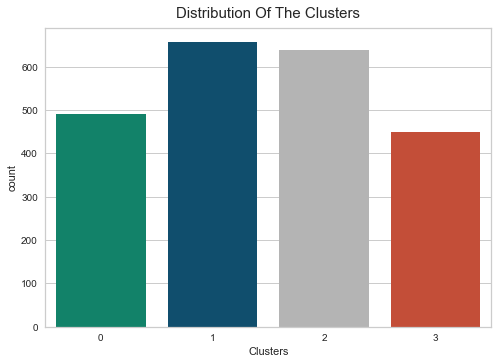

In [ ]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters", pad=10, size = 15)
plt.show()

These clusters show a relatively even distribution across the dataset. Since we identified that Income and Spent have significant contributions to the distribution, we will create a plot of the clusters based on these two variables.

#### 7.2 Clusters based on income and time spent

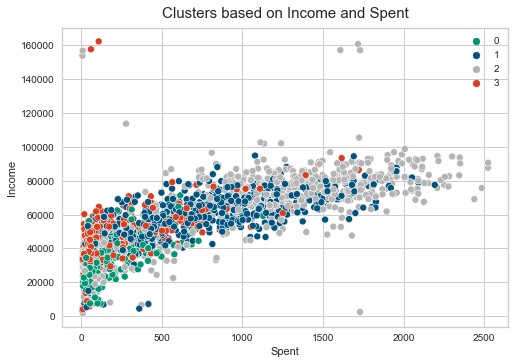

In [ ]:
pl = sns.scatterplot(data = df, x = df['Spent'], y = df['Income'], hue = df['Clusters'], palette = pal)
pl.set_title('Clusters based on Income and Spent', pad=10, size=15)
plt.legend()
plt.show()

As shown above, Income and Spent have a strong relationship. Clusters shows a more detail insights into their patterns:

Group 0: Low spending and low income

Group 3: Low spending and average income

Group 2: High spending and high income

Group 1: High spending and average income


To make it more comprehensible, we will classify Group 0 as ordinary customers, Group 1 as good customers, Group 2 as elite customers, and Group 3 as potential good customers.

In [ ]:
#Define name of customer groups according to clusters
re_clust = {
    0: 'Ordinary Customer',
    1: 'Good Customer',
    2: 'Elite Customer',
    3: 'Potential Good Customer'}
df['Clusters_Customers'] = df['Clusters'].map(re_clust)

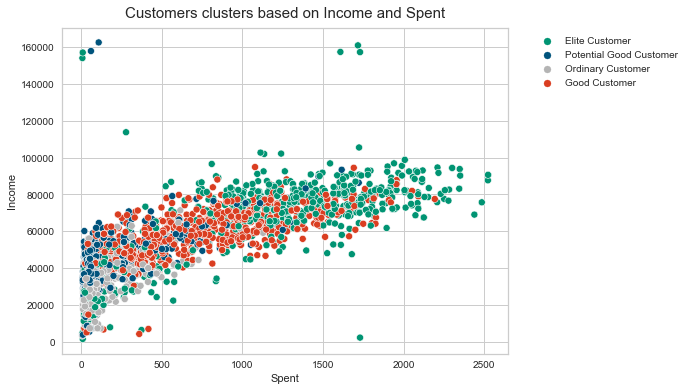

In [ ]:
#Plot clusters of customers based on Income and Spent
plt.figure(figsize=(8, 6))
pl = sns.scatterplot(data = df, x = df['Spent'], y = df['Income'], hue = df['Clusters_Customers'], palette = pal, s=50)
pl.set_title('Customers clusters based on Income and Spent', pad=10, size=15)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.4, 1))
plt.show()
plt.show()

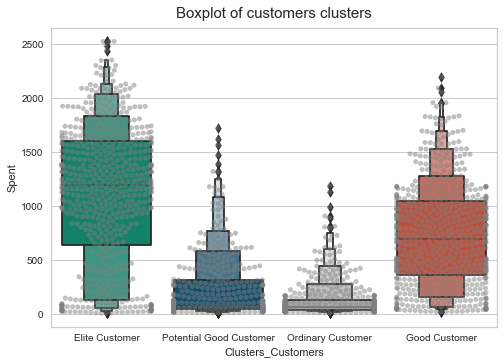

In [ ]:
#Plot detailed distribution of cluster through boxplot
plt.figure()
pl=sns.swarmplot(x=df["Clusters_Customers"], y=df["Spent"], color= "gray", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters_Customers"], y=df["Spent"], palette=pal)
pl.set_title("Boxplot of customers clusters", pad=10, size=15)
plt.show()

The box plot indicates that Elite and Good customers spend significantly more per customer, averaging at £1400 and £800 respectively, compared to Ordinary and Potentially good customers whose spending range is around £500 only. As a result, different marketing campaigns will be developed for each group. To begin this process, we will examine the past marketing campaigns to see how much each group spent on the targeted marketing strategies.

#### 7.3 Clusters based on products spending

In [ ]:
#Calculate spending of different products of each customer group

#Group by clusters_customers and calculate total amount of spending by each product
spending_by_product = df.groupby('Clusters_Customers')[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']].sum()

#Transpose the result
spending_by_product = spending_by_product.transpose()

#Reset the index 
spending_by_product = spending_by_product.reset_index()

#Rename column
spending_by_product = spending_by_product.rename(columns = {'index': 'Category'})

spending_by_product

Clusters_Customers,Category,Elite Customer,Good Customer,Ordinary Customer,Potential Good Customer
0,Wines,310167,281790,24562,63510
1,Fruits,33263,18858,3624,3008
2,Meat,240470,94227,16661,22017
3,Fish,48735,26047,4999,4150
4,Sweets,33792,19946,3366,3448
5,Gold,40705,38088,9516,10037


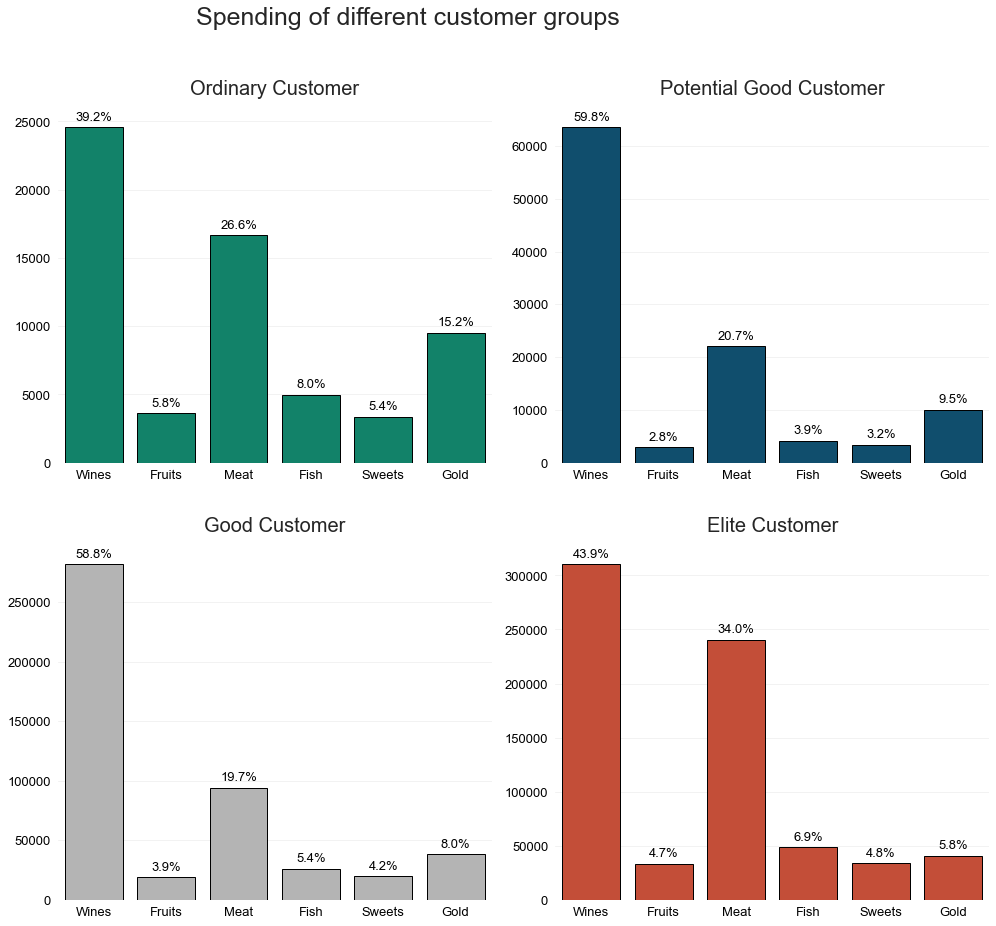

In [ ]:
# Plot bar charts
#Creates a figure with 4 subplots using the subplots() function from matplotlib
fig = plt.figure(figsize=(14, 12)) 

#Initializes k=1 and creates a list cl of strings representing the names of each customer cluster
k = 1
cl = ['Ordinary Customer', 'Potential Good Customer', 'Good Customer', 'Elite Customer']

#
for i in cl:
    #only the columns Category and i are selected, where i is the current iteration of the cl list 
    ass = spending_by_product[['Category', i]]
    
    #create a subplot in a grid with 2 rows and 2 columns, and it sets the current subplot to the k position
    plt.subplot(2, 2, k)
    plt.title(i, size = 20, x = 0.5, y = 1.03)
    plt.grid(color = 'gray', linestyle = '-', axis = 'y', alpha = 0.1)
    cluster_color = pal[k-1]
    
    #create barplot using seaborn where x is products in the category, y is the current iteration of the cl list
    a = sns.barplot(data = ass, x = 'Category', y = i, color = cluster_color, linestyle = "-", linewidth = 1, edgecolor = "black")
    plt.xticks(size = 13, color = 'black')
    plt.yticks(size = 13, color = 'black')
    plt.xlabel('')
    plt.ylabel('')
    
    #add annotations to the barplot by percentage of spending amount
    for p in a.patches:
        #set the x-coordinate to the center of the current bar patch
        x_pos = p.get_x() + p.get_width() / 2
        
        #get the height of the current patch
        y_pos = p.get_height()
        
        #calculate percentage of spending amount (current patch) and the total spending of the group
        percentage = round((y_pos / sum(ass[i])) * 100, 1)
        a.annotate(
            f'{percentage}%', #text to be displayed
            xy=(x_pos, y_pos), #position to be placed
            ha='center', va='center', #alignment of the text
            size=13, 
            color='black',
            xytext = (0, 10), 
            textcoords = 'offset points')
    
    #hide spines of the barplot (the right, top, left and bottom borders)
    for spine in ['right', 'top', 'left', 'bottom']:
        a.spines[spine].set_visible(False)
        
    #increment k after iteration of the loop
    k += 1

plt.figtext(0.2, 1.05, 'Spending of different customer groups', size = 25)
fig.tight_layout(h_pad = 3)
plt.show()

All four groups spent the highest amount on Wines, followed by Meat, out of six different products.

In terms of purchasing Gold, Ordinary and Potentially good customers are more inclined to do so, with percentages of 17.7% and 10.5% respectively, while the other two groups only have percentages of 8% and 5.4%.

Elite customers, on the other hand, have a greater tendency to buy Meat, accounting for around £240,000 or 33.9% of their total spending, which is higher than the other groups' spending of less than 26%.


#### 7.4 Clusters based on Promotions

In [ ]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

# Group the data by cluster and sum the total number of promotions accepted
cluster_promos = df.groupby('Clusters_Customers')[['Total_Promos']].sum().reset_index()

# Calculate the percentage of promotions accepted for each cluster
cluster_promos['Percentage_Promos'] = round(cluster_promos['Total_Promos']*100/ cluster_promos['Total_Promos'].sum(), 2)

cluster_promos

,Clusters_Customers,Total_Promos,Percentage_Promos
0,Elite Customer,382,57.36
1,Good Customer,178,26.73
2,Ordinary Customer,50,7.51
3,Potential Good Customer,56,8.41


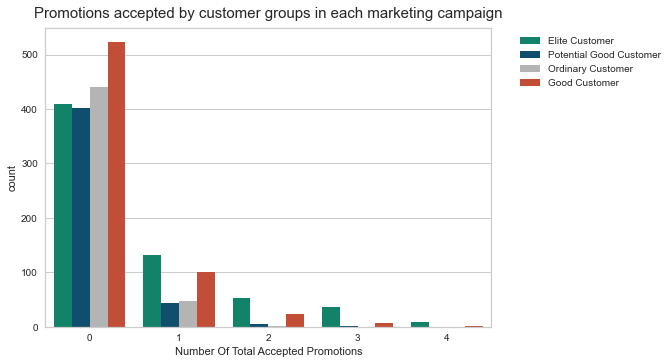

In [ ]:
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters_Customers"], palette= pal)
pl.set_title("Promotions accepted by customer groups in each marketing campaign", pad=10, size=15)
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.legend(loc = 'upper right', bbox_to_anchor=(1.4, 1))
plt.show()

For the initial marketing campaign, the Ordinary and Potentially good customer groups had around 500 acceptances each, while the Good and Elite customer groups had 400 and 300 acceptances respectively.

In subsequent campaigns, the number of accepted promotions declined significantly. The Ordinary and Potentially good customers tent to not accept the offer, while only a small portion of the Good and Elite customers accepted it.

## 8. PROFILING
Now we have formed the clusters and looked at their purchasing habits. Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. On the basis of the outcomes, I will be arriving at the conclusions.

<Figure size 576x396 with 0 Axes>

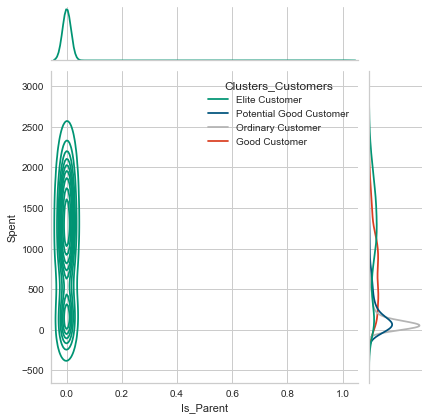

<Figure size 576x396 with 0 Axes>

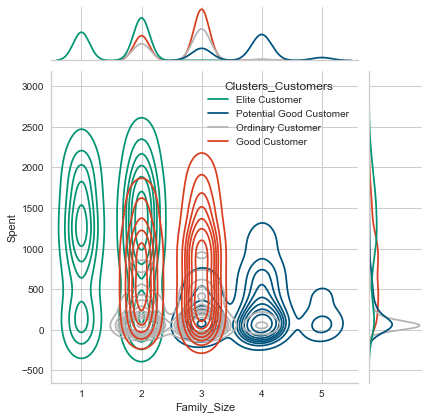

<Figure size 576x396 with 0 Axes>

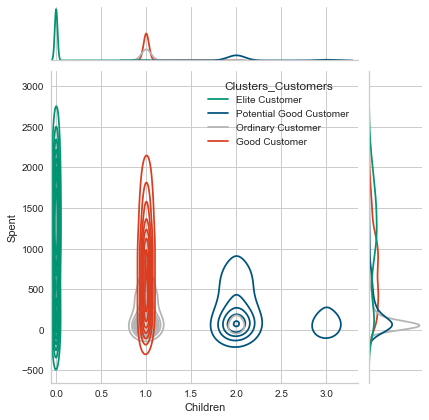

<Figure size 576x396 with 0 Axes>

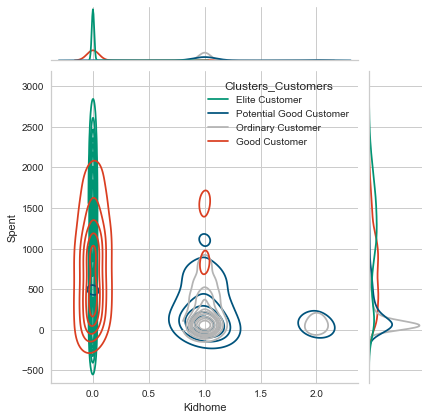

<Figure size 576x396 with 0 Axes>

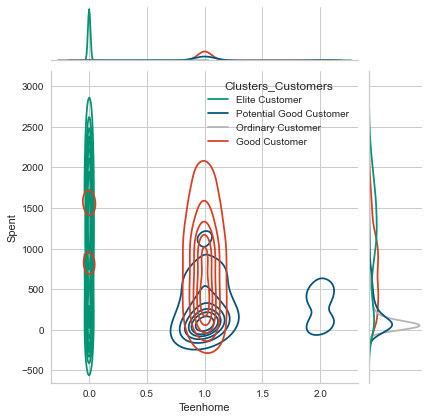

<Figure size 576x396 with 0 Axes>

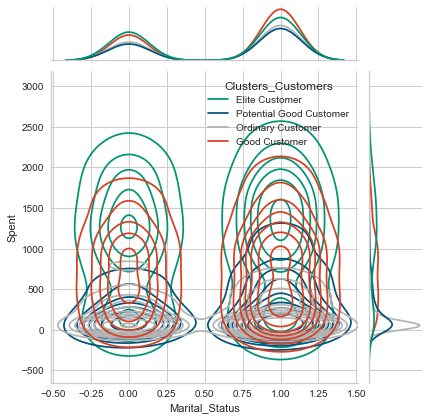

<Figure size 576x396 with 0 Axes>

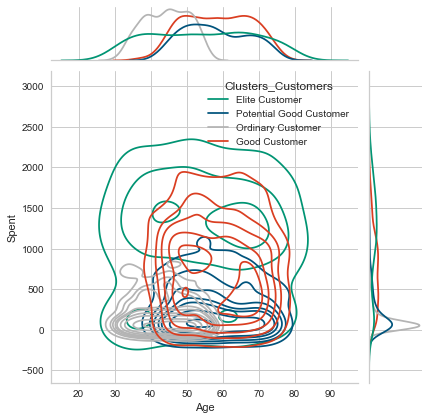

<Figure size 576x396 with 0 Axes>

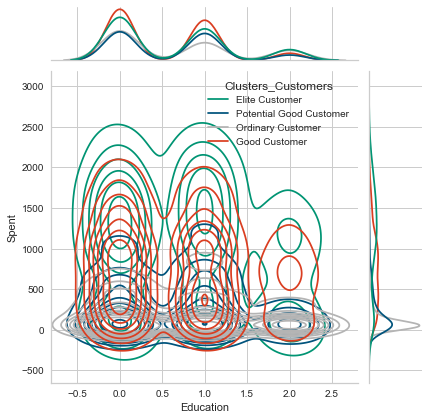

In [ ]:
Personal = ["Is_Parent", "Family_Size", "Children", "Kidhome","Teenhome",
            "Marital_Status", "Age", "Education"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=ds[i], y=df["Spent"], hue =df["Clusters_Customers"], kind="kde", palette=pal)
    plt.show()